# Data cleaning and preprocessing

In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
data = pd.read_csv("./Titanic-Dataset.csv")

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## (1) Check duplicate rows

In [8]:
data.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
886    False
887    False
888    False
889    False
890    False
Length: 891, dtype: bool

In [9]:
data.duplicated().sum() # check how many duplicate rows we have

0

In [11]:
# if there are duplicate rows, how to delte?
# Drop duplicate rows, keeping the first occurrence
data = data.drop_duplicates()

## (2) Count unique values (for categorical columns)

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 90.5+ KB


In [14]:
cal_col = [col for col in data.columns if data[col].dtype=='object']
num_col = [col for col in data.columns if data[col].dtype!='object']

In [15]:
data[cal_col].nunique()

Name        891
Sex           2
Ticket      681
Cabin       147
Embarked      3
dtype: int64

## (3) Check missing values as percentage

In [24]:
round(data.isnull().sum()/data.shape[0]*100, 2)

PassengerId     0.00
Survived        0.00
Pclass          0.00
Name            0.00
Sex             0.00
Age            19.87
SibSp           0.00
Parch           0.00
Ticket          0.00
Fare            0.00
Cabin          77.10
Embarked        0.22
dtype: float64

## (4) Handling missing values.

Discard, or use mean, median, mode to replace, or mark it as unkonwn

In [28]:
# To discard data-heavy missing columns
data = data.drop(columns=['Cabin'])
data.dropna(subset=['Embarked'], inplace = True)
data['Age'].fillna(data['Age'].mean(), inplace = True)

## (5) Check outliers

### Method 1: IQR

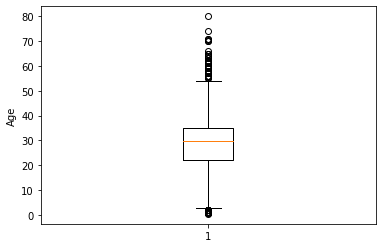

In [32]:
# Box plot (IQR)
plt.boxplot(data['Age'])
plt.ylabel('Age')
plt.show()

In [36]:
IQ1 = np.percentile(data['Age'].values,25)

In [37]:
IQ3 = np.percentile(data['Age'].values,75)

In [38]:
IQ = IQ3-IQ1

In [39]:
lower_bound = IQ1-1.5*IQ

In [40]:
upper_bound = IQ3 + 1.5*IQ

In [42]:
lower_bound, upper_bound

(2.5, 54.5)

### Method2 Z-score

In [45]:
mean = data['Age'].mean()
std = data['Age'].std()

In [46]:
mean, std

(29.642092696629216, 12.968346294351779)

In [47]:
lower_bound2 = mean-2*std

In [48]:
upper_bound2 = mean+2*std

In [49]:
lower_bound2, upper_bound2

(3.7054001079256587, 55.57878528533277)

In [50]:
data = data[(data['Age']>=lower_bound2)&(data['Age']<=upper_bound2)]